# Домашнє завдання №9

In [1]:
import numpy as np
from tensorflow import keras
from keras.datasets import fashion_mnist

## Завантаження датасету

In [2]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [3]:
print("Розмір тренувального датасету:", len(train_data))
print("Перший елемент тренувального датасету:", train_data[0])
print("Мітки тренувального датасету:", train_labels)
print("Значення мітоки: від", min(train_labels), "до", max(train_labels))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 60000
Перший елемент тренувального датасету: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  

In [4]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


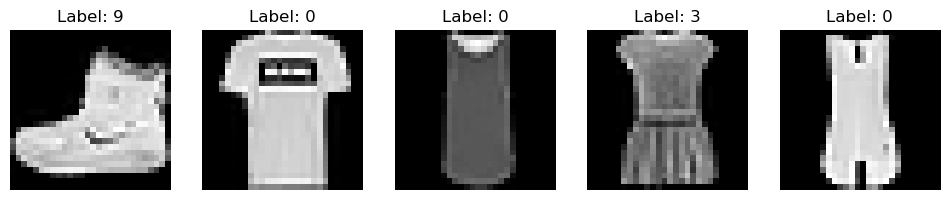

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt

num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()


## Початкові значення параметрів

In [6]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = 784 # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 20 # максимальне число епох
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів

n_hidden_1 = 64 # кількість нейронів 1-го шару
n_hidden_2 = 64 # кількість нейронів 2-го шару

In [7]:
from keras.utils import to_categorical

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(train_data, np.float32), np.array(test_data, np.float32)

# Перетворюємо матриці розміром 28x28 пікселів у вектор з 784 елементів
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

# Перетворюємо цілочисельні мітки на тип float32
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Перетворюємо мітки в категорійний формат
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)


## Створення моделі

## Конфігурація №1:
1. Кількість шарів - 2
2. Функція активації внутрішнього шару - ReLU
3. Кількість нейронів внутрішнього шару - 64
4. Кількість епох - 20
5. Розмір батчу - 256
6. Оптимізатор - RMSprop
7. Швидкість начання - 0.001

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras import losses
from keras import metrics


model = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dense(num_classes, activation='softmax'),                    
])

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=learning_rate),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
)

/Users/katerynaturuntseva/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,890 (198.79 KB)

 Trainable params: 50,890 (198.79 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [11]:
def model_fit(model):
    history = model.fit(
        partial_x_train, 
        partial_y_train, 
        epochs=training_steps,
        batch_size=batch_size,
        validation_data=(x_val, y_val)
    )
    return history

In [12]:
def history_visual(history):    
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

Epoch 1/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6905 - loss: 0.9447 - val_accuracy: 0.8115 - val_loss: 0.5482
Epoch 2/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8248 - loss: 0.5011 - val_accuracy: 0.8344 - val_loss: 0.4860
Epoch 3/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8422 - loss: 0.4473 - val_accuracy: 0.8270 - val_loss: 0.4784
Epoch 4/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8524 - loss: 0.4148 - val_accuracy: 0.8501 - val_loss: 0.4243
Epoch 5/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8605 - loss: 0.3883 - val_accuracy: 0.8532 - val_loss: 0.4141
Epoch 6/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8653 - loss: 0.3765 - val_accuracy: 0.8596 - val_loss: 0.3850
Epoch 7/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8720 - loss: 0.3582 - val_accuracy: 0.8394 - val_loss: 0.4290
Epoch 8/20
196/196 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8739 - loss: 0.3550 - val_accuracy: 0.

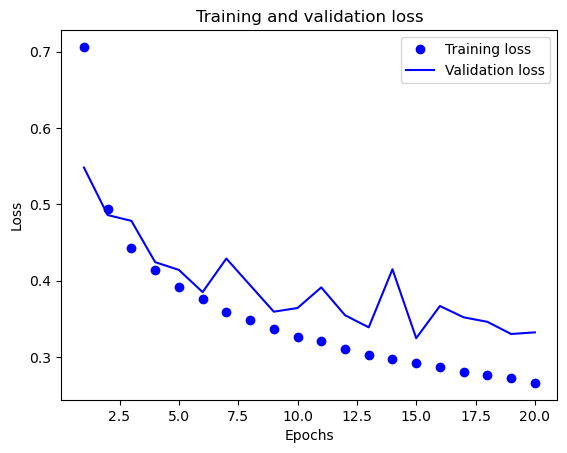

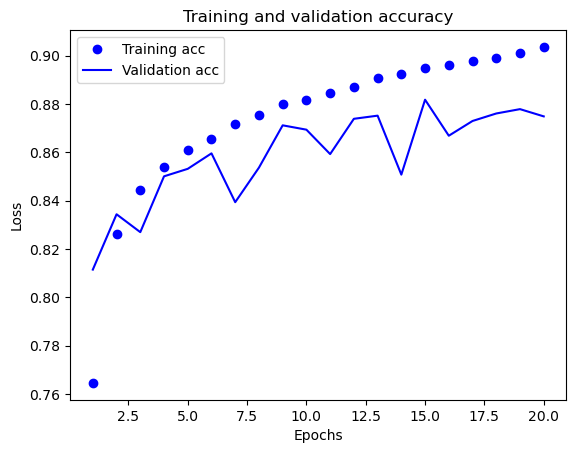

In [13]:
history = model_fit(model)
history_visual(history)

## Висновок №1
Побудована модель показала непогані результати на навчальній вибірці: точність нейромережі становить приблизно 91%. Однак, на валідаційних даних результати гірші: максимальна точність склала 88.5%. Змінимо параметри нашої моделі і проведемо другий етап експерименту.

## Конфігурація №2:
1. Кількість шарів - 3
2. Функція активації внутрішніх шарів - ReLU
3. Кількість нейронів 1 внутрішнього шару - 256
3. Кількість нейронів 2 внутрішнього шару - 128
4. Кількість епох - 40
5. Розмір батчу - 250
6. Оптимізатор - RMSprop
7. Швидкість начання - 0.001

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6863 - loss: 0.8729 - val_accuracy: 0.8306 - val_loss: 0.4647
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8350 - loss: 0.4524 - val_accuracy: 0.8450 - val_loss: 0.4288
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8580 - loss: 0.3877 - val_accuracy: 0.8734 - val_loss: 0.3486
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8743 - loss: 0.3423 - val_accuracy: 0.8811 - val_loss: 0.3249
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8813 - loss: 0.3135 - val_accuracy: 0.8824 - val_loss: 0.3205
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8850 - loss: 0.3022 - val_accuracy: 0.8720 - val_loss: 0.3331
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8906 - loss: 0.2874 - val_accuracy: 0.8835 - val_loss: 0.3163
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8962 - loss: 0.2714 - val_accuracy: 0.

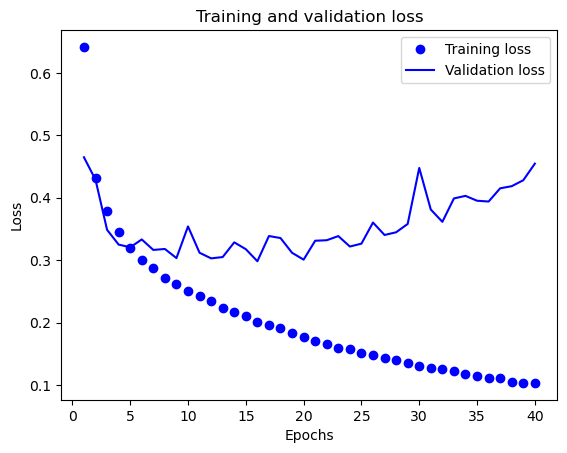

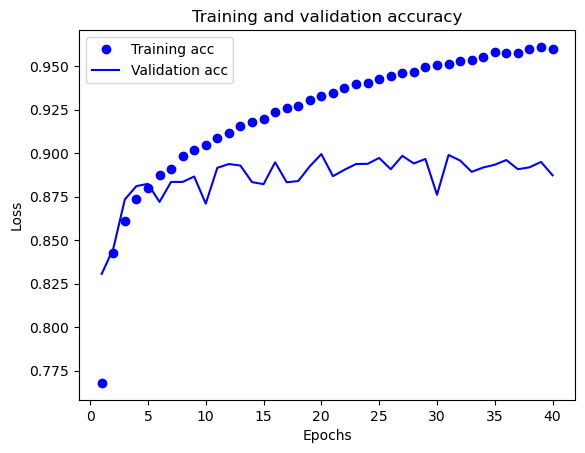

In [14]:
learning_rate = 0.001 # швидкість навчання нейронної мережі
training_steps = 40 # число епох
batch_size = 250 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів
n_hidden_1 = 256 # кількість нейронів 1-го шару
n_hidden_2 = 128 # кількість нейронів 2-го шару

model1 = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dense(n_hidden_2, activation='relu'),
    Dense(num_classes, activation='softmax'),                    
])

model1.compile(
    optimizer=optimizers.RMSprop(learning_rate=learning_rate),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
)

history1 = model_fit(model1)
history_visual(history1)

## Висновок №2
Побудована модель показала кращі результати на навчальній вибірці: точність нейромережі становить приблизно 96%. На валідаційних даних  максимальна точність склала 90%. Спробуємо покращити модель за рахунок регуляризації.

## Конфігурація №3:
1. Кількість шарів - 3
2. Функція активації внутрішніх шарів - ReLU
3. Кількість нейронів 1 внутрішнього шару - 256
3. Кількість нейронів 2 внутрішнього шару - 128
4. Кількість епох - 40
5. Розмір батчу - 250
6. Оптимізатор - RMSprop
7. Швидкість начання - 0.001
8. Метод регуляризації - Dropout

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6071 - loss: 1.1127 - val_accuracy: 0.8187 - val_loss: 0.4797
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7983 - loss: 0.5570 - val_accuracy: 0.8444 - val_loss: 0.4335
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8268 - loss: 0.4911 - val_accuracy: 0.8537 - val_loss: 0.3935
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8374 - loss: 0.4541 - val_accuracy: 0.8644 - val_loss: 0.3753
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8459 - loss: 0.4341 - val_accuracy: 0.8674 - val_loss: 0.3682
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8499 - loss: 0.4210 - val_accuracy: 0.8704 - val_loss: 0.3615
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8582 - loss: 0.3995 - val_accuracy: 0.8722 - val_loss: 0.3500
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8550 - loss: 0.4028 - val_accuracy: 0.

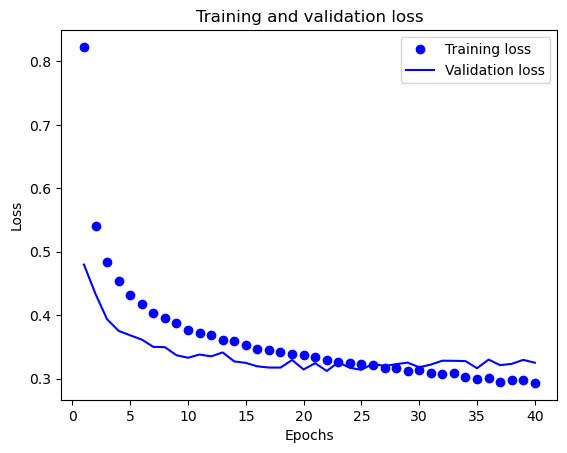

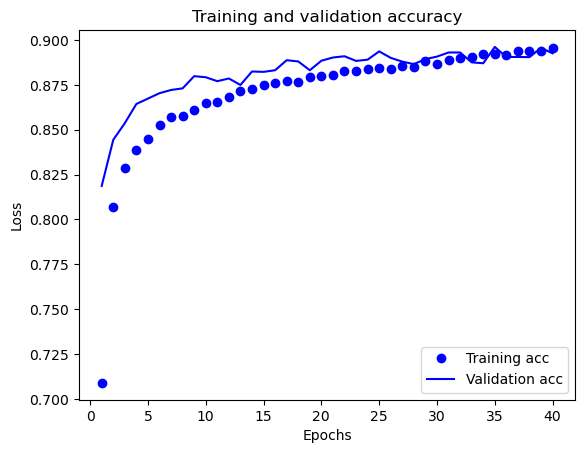

In [15]:
from keras.layers import Dropout

training_steps = 40

model2 = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dropout(0.5),  
    Dense(n_hidden_2, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

model2.compile(
    optimizer=optimizers.RMSprop(learning_rate=learning_rate),
    loss=losses.categorical_crossentropy,
    metrics=['accuracy']
)

history2 = model_fit(model2)
history_visual(history2)

## Висновок №3
Побудована модель містить регуляризатор Dropout, який випадковим чином вимикає деякі нейрони під час навчання, тим самим роблячи мережу більш стійкою. Але модель при цьому показала дещо гірші результати на навчальній вибірці: точність нейромережі становить приблизно 89%. На валідаційних даних  максимальна точність теж склала 89%. Спробуємо покращити модель за рахунок інших методів оптимізації.

## Конфігурація №4:
До попередніх налаштувань використаємо планувальник швидкості навчання

Epoch 1/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6104 - loss: 1.0993 - val_accuracy: 0.8116 - val_loss: 0.5063
Epoch 2/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8045 - loss: 0.5587 - val_accuracy: 0.8486 - val_loss: 0.4128
Epoch 3/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8279 - loss: 0.4904 - val_accuracy: 0.8563 - val_loss: 0.3938
Epoch 4/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8374 - loss: 0.4608 - val_accuracy: 0.8625 - val_loss: 0.3724
Epoch 5/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8445 - loss: 0.4340 - val_accuracy: 0.8572 - val_loss: 0.3759
Epoch 6/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8542 - loss: 0.4115 - val_accuracy: 0.8580 - val_loss: 0.3734
Epoch 7/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8579 - loss: 0.3963 - val_accuracy: 0.8706 - val_loss: 0.3521
Epoch 8/40
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8588 - loss: 0.3956 - val_accuracy: 0.

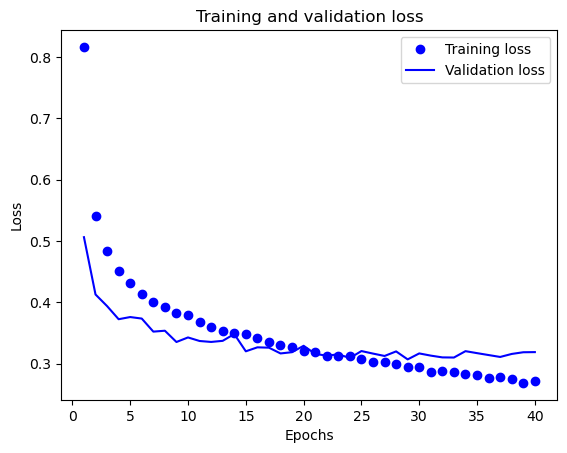

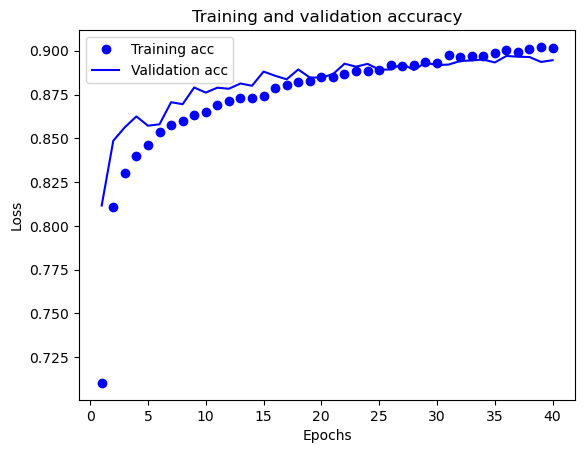

In [16]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import RMSprop

# Параметри для планувальника швидкості навчання
initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

model3 = Sequential([
    Dense(n_hidden_1, activation='relu', input_shape=(num_features,)),
    Dropout(0.5),  
    Dense(n_hidden_2, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

# Використовуємо планувальник для оптимізатора
optimizer = RMSprop(learning_rate=lr_schedule)

model3.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history3 = model_fit(model3)
history_visual(history3)

## Висновок №4
Використання планувальника швидкості навчання дозволило дещо покращити модель: точність нейромережі становить приблизно 90%. На валідаційних даних  максимальна точність теж склала 90%. 

## Конфігурація №5:
1. Кількість шарів - 3
2. Функція активації внутрішніх шарів - PReLU
3. Кількість нейронів 1 внутрішнього шару - 256
3. Кількість нейронів 2 внутрішнього шару - 128
4. Кількість епох - 50
5. Розмір батчу - 250
6. Оптимізатор - Adam
7. Метод регуляризації - Dropout

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5726 - loss: 1.2088 - val_accuracy: 0.8261 - val_loss: 0.4817
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8026 - loss: 0.5585 - val_accuracy: 0.8492 - val_loss: 0.4154
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8314 - loss: 0.4806 - val_accuracy: 0.8605 - val_loss: 0.3825
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8408 - loss: 0.4420 - val_accuracy: 0.8641 - val_loss: 0.3746
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8489 - loss: 0.4211 - val_accuracy: 0.8672 - val_loss: 0.3599
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8525 - loss: 0.4079 - val_accuracy: 0.8715 - val_loss: 0.3466
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8563 - loss: 0.3980 - val_accuracy: 0.8710 - val_loss: 0.3427
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8616 - loss: 0.3762 - val_accuracy: 0.

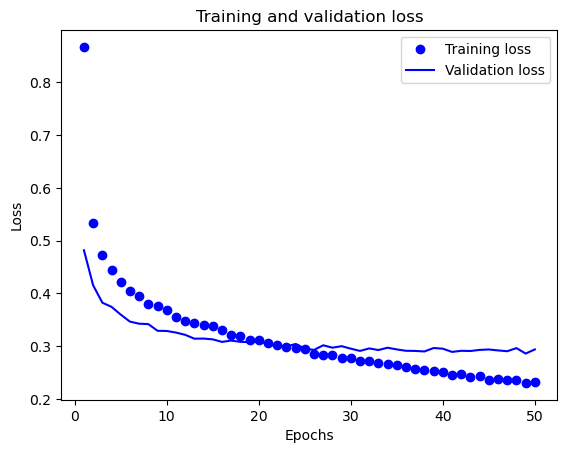

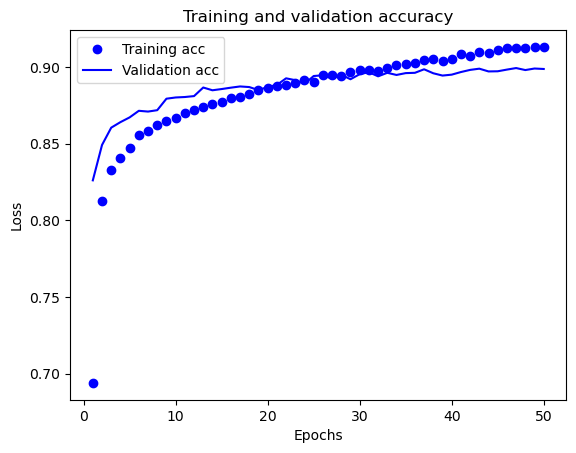

In [19]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.layers import PReLU

training_steps = 50

initial_learning_rate = 0.001
lr_schedule = ExponentialDecay(
    initial_learning_rate,
    decay_steps=1000,
    decay_rate=0.9,
    staircase=True)

model4 = Sequential([
    Dense(n_hidden_1, input_shape=(num_features,)),
    PReLU(),
    Dropout(0.5),  
    Dense(n_hidden_2),
    PReLU(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax'),
])

# Використовуємо планувальник для оптимізатора
optimizer = Adam(learning_rate=lr_schedule)

model4.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history4 = model_fit(model4)
history_visual(history4)

## Висновок №5
Використання функції активації PReLU і оптимізатора Adam дозволило покращити модель: точність нейромережі становить приблизно 91%. На валідаційних даних  максимальна точність склала 90%.

## Результати роботи моделі на тестових даних

In [20]:
test_loss, test_accuracy = model4.evaluate(x_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 456us/step - accuracy: 0.8901 - loss: 0.3224
Test Loss: 0.32037627696990967
Test Accuracy: 0.8902000188827515


## Передбачення для тестових даних

In [21]:
predictions = model4.predict(x_test)

print(f'Predictions for the first example: {predictions[0]}')

predicted_classes = np.argmax(predictions, axis=1)

print(f'Predicted classes for the first examples: {predicted_classes[:10]}')
print(f'Real classes for the first examples: {test_labels[:10]}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step
Predictions for the first example: [1.0719018e-08 1.7824893e-06 7.7987057e-09 4.0591424e-08 2.8291622e-09
 1.8075180e-04 1.2472592e-08 1.2244331e-03 1.5680282e-08 9.9859297e-01]
Predicted classes for the first examples: [9 2 1 1 6 1 4 6 5 7]
Real classes for the first examples: [9 2 1 1 6 1 4 6 5 7]


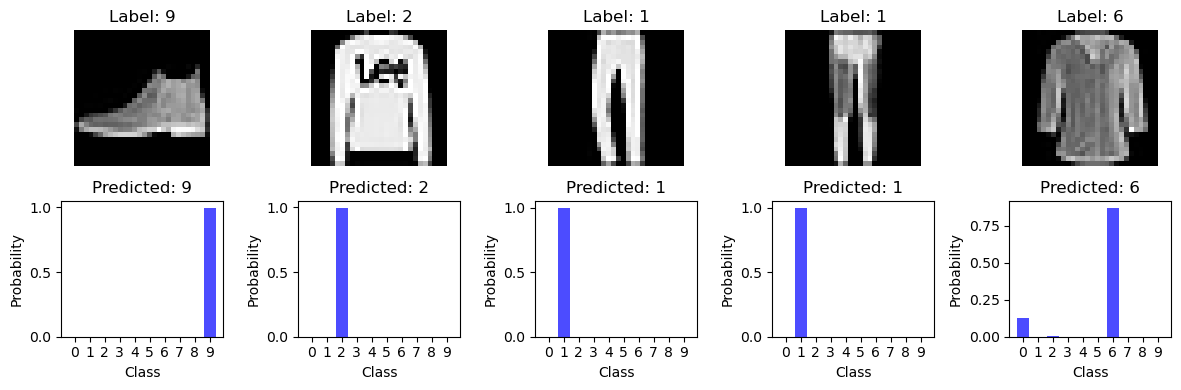

In [22]:
num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(2, num_samples, i + 1)
    plt.imshow(test_data[i], cmap='gray')  
    plt.title(f"Label: {test_labels[i]}")  
    plt.axis('off')

    plt.subplot(2, num_samples, i + num_samples + 1)
    plt.bar(range(10), predictions[i], color='blue', alpha=0.7)
    plt.title(f"Predicted: {predicted_classes[i]}")
    plt.xticks(range(10))
    plt.xlabel("Class")
    plt.ylabel("Probability")

plt.tight_layout()
plt.show()


# Висновок:
Нам вдалося налаштувати модель згідно з умовами завдання. В процесі оптимізації моделі змінювалися різні гіперпараметри і були обрані такі значення:
1. Кількість шарів - 3
2. Функція активації внутрішніх шарів - PReLU
3. Кількість нейронів 1 внутрішнього шару - 256
4. Кількість нейронів 2 внутрішнього шару - 128
5. Кількість епох - 50
6. Розмір батчу - 250
7. Оптимізатор - Adam
8. Метод регуляризації - Dropout